In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv('D:/Python/4_stocks_1995_2017.csv', index_col='Date')

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5779 entries, 1995-01-03 to 2017-12-12
Data columns (total 4 columns):
PG      5779 non-null float64
MSFT    5779 non-null float64
F       5779 non-null float64
GE      5779 non-null float64
dtypes: float64(4)
memory usage: 225.7+ KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.960464,2.498429,5.091914,4.479902
1995-01-04,8.888638,2.516591,5.228918,4.479902
1995-01-05,8.762941,2.475080,5.183250,4.490882
1995-01-06,8.780898,2.516591,5.183250,4.468922
1995-01-09,8.744981,2.501024,5.274583,4.425002


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,91.250000,82.779999,12.380,17.660000
2017-12-07,90.099998,82.489998,12.530,17.709999
2017-12-08,90.370003,84.160004,12.610,17.709999
2017-12-11,90.230003,85.230003,12.580,17.650000
2017-12-12,90.055000,85.650002,12.525,17.959999


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03, dtype: float64

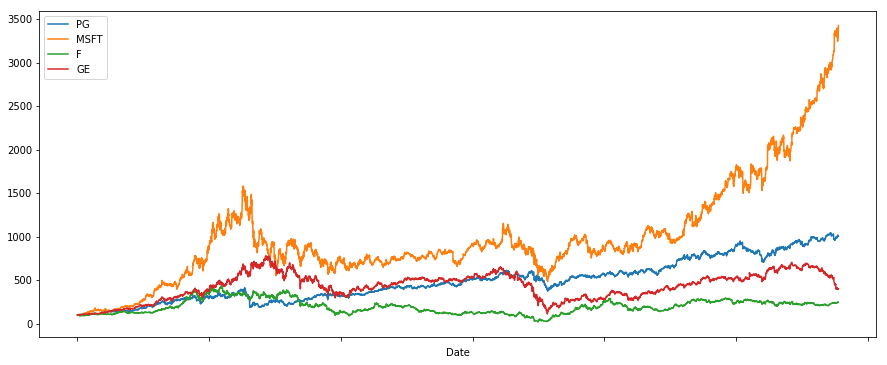

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

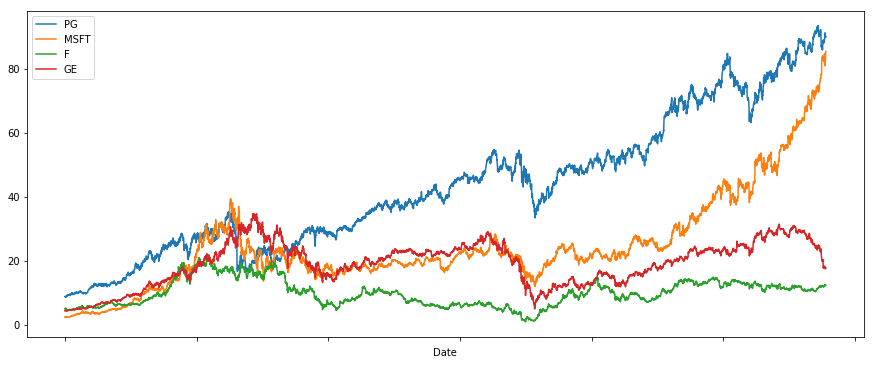

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['1995-01-03']

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03, dtype: float64

In [10]:
mydata.iloc[0]

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
np.dot(returns, weights)

array([        nan,  0.00653992, -0.00922976, ...,  0.00740659,
        0.00134944,  0.00404499])

***

In [14]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64

In [15]:
np.dot(annual_returns, weights)

0.1373651600530974

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

13.736999999999998 %


***

In [17]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

13.736999999999998 %
15.417 %
